# Import statements

In [3]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import logging
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy.stats import norm
from copy import deepcopy

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from scipy.stats import norm, sem
from scipy.interpolate import UnivariateSpline
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


from metalearners import *
from synthetic_data import *

In [4]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Simulation 

In [9]:
def simulate_result(learner,true_ite,X,y,treatment,test_size,train_sizes):
    ''' simulate result for t rounds
    learner: s/t/x learner
    true_ite,X,y: pass in data needed
    test_size: the size of test set
    train_sizes: a list of training size to use
    t: number of rounds

    '''

    result = []
    X_test,y_test,treatment_test = X[test_size:,:], y[test_size:],treatment[test_size:]
    for train_size in tqdm(train_sizes):
        X_train,y_train,treatment_train = X[:train_size,:], y[:train_size],treatment[:train_size]
        #initiate learner again
        learner = learner
        learner.fit(X = X_train, treatment = treatment_train,y=y_train)
        ite, _, _ = learner.get_ite(X= X_test,treatment = treatment_test, y = y_test)
        result.append(rmse(ite,true_ite[test_size:]))
    return result

## 1.1 unbalanced data

tested with N= 100000, d=20,simulation=1, training set 50000, test size 10000


Slearner: RF: 5.3, XGBoost: 1.64
Tlearner: RF: 5.36,XGBoost: 5.46
Xlearner: RF: 1.95,XGBoost: 1.31

In [54]:
data_generator = synthetic_data(N=(1100000), d=20,simulation=1)
true_ite,  X, y,treatment,propensity = data_generator.get_full_data()

baselearner = RandomForestRegressor(max_depth = 20, n_estimators = 20)
slearner = Slearner(baselearner = baselearner, is_regressor=True)
tlearner = Tlearner(baseclearner = baselearner, basetlearner = baselearner,is_regressor=True)
xlearner = Xlearner(learner = baselearner, propensity_model = LogisticRegression(),is_regressor=True)
rf_results1={}
rf_results1['slearner'] = simulate_result(slearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
rf_results1['tlearner'] = simulate_result(tlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
rf_results1['xlearner'] = simulate_result(xlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])


100%|██████████| 7/7 [16:59<00:00, 145.64s/it]

100%|██████████| 7/7 [16:06<00:00, 138.12s/it]

100%|██████████| 7/7 [35:32<00:00, 304.64s/it]


T-learner improves very slow

In [ ]:
data_generator = synthetic_data(N=(1100000), d=20,simulation=1)
true_ite,  X, y,treatment,propensity = data_generator.get_full_data()

baselearner = xgb.XGBRegressor(objective ='reg:squarederror')
slearner = Slearner(baselearner = baselearner, is_regressor=True)
tlearner = Tlearner(baseclearner = baselearner, basetlearner = baselearner,is_regressor=True)
xlearner = Xlearner(learner = baselearner, propensity_model = LogisticRegression(),is_regressor=True)
xgb_results1={}
xgb_results1['slearner'] = simulate_result(slearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
xgb_results1['tlearner'] = simulate_result(tlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
xgb_results1['xlearner'] = simulate_result(xlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])

In [56]:
rf_results_df1 = pd.DataFrame(data = rf_results1,index=[1,5,10,100,200,500,1000])
xgb_results_df1 = pd.DataFrame(data = xgb_results,index=[1,5,10,100,200,500,1000])

In [ ]:
rf_results_df

Text(0.5, 1.0, 'RF')

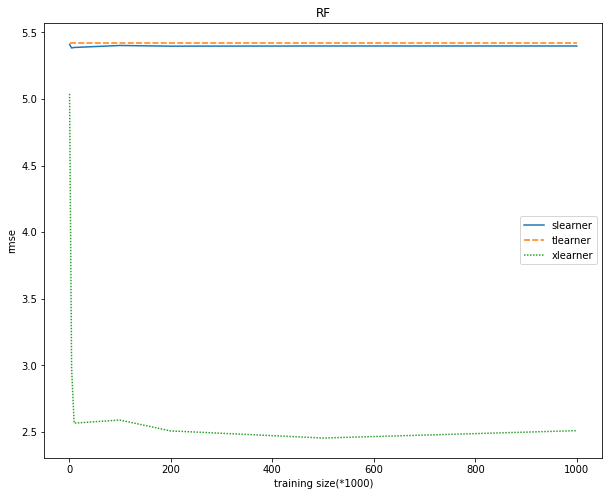

In [57]:
fig, p = plt.subplots(figsize = (10,8))
p=sns.lineplot(data=rf_results_df1)
p.set_xlabel('training size(*1000)')
p.set_ylabel('rmse')
p.set_title("RF")

Text(0.5, 1.0, 'XGBoost')

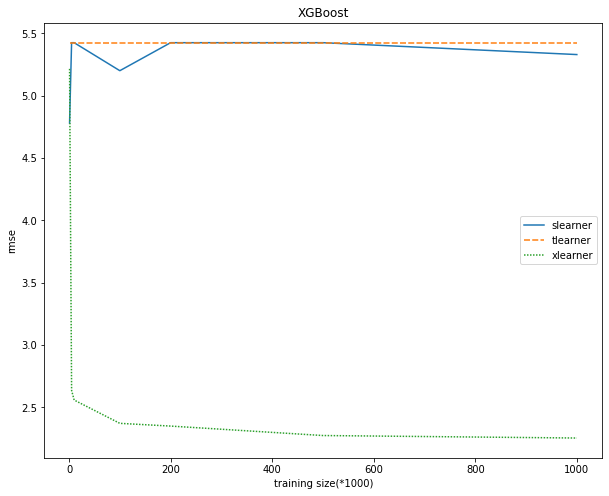

In [51]:
fig, p = plt.subplots(figsize = (10,8))
p=sns.lineplot(data=xgb_results_df1)
p.set_xlabel('training size(*1000)')
p.set_ylabel('rmse')
p.set_title("XGBoost")

## 1.2 Balanced class without confounding


### 1.2.1 Complex CATE

#### Complex linear

In [ ]:
data_generator = synthetic_data(N=(1100000), d=20,simulation=2)
true_ite,  X, y,treatment,propensity = data_generator.get_full_data()

baselearner = RandomForestRegressor(max_depth = 20, n_estimators = 20)
slearner = Slearner(baselearner = baselearner, is_regressor=True)
tlearner = Tlearner(baseclearner = baselearner, basetlearner = baselearner,is_regressor=True)
xlearner = Xlearner(learner = baselearner, propensity_model = LogisticRegression(),is_regressor=True)


rf_results2={}
rf_results2['slearner'] = simulate_result(slearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
rf_results2['tlearner'] = simulate_result(tlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
rf_results2['xlearner'] = simulate_result(xlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])

In [ ]:
baselearner = xgb.XGBRegressor(objective ='reg:squarederror')
slearner = Slearner(baselearner = baselearner, is_regressor=True)
tlearner = Tlearner(baseclearner = baselearner, basetlearner = baselearner,is_regressor=True)
xlearner = Xlearner(learner = baselearner, propensity_model = LogisticRegression(),is_regressor=True)

xgb_results2={}
xgb_results2['slearner'] = simulate_result(slearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
xgb_results2['tlearner'] = simulate_result(tlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
xgb_results2['xlearner'] = simulate_result(xlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])

In [ ]:
rf_results_df2 = pd.DataFrame(data = rf_results2,index=[1,5,10,100,200,500,1000])
xgb_results_df2 = pd.DataFrame(data = xgb_results2,index=[1,5,10,100,200,500,1000])

Text(0.5, 1.0, 'RF')

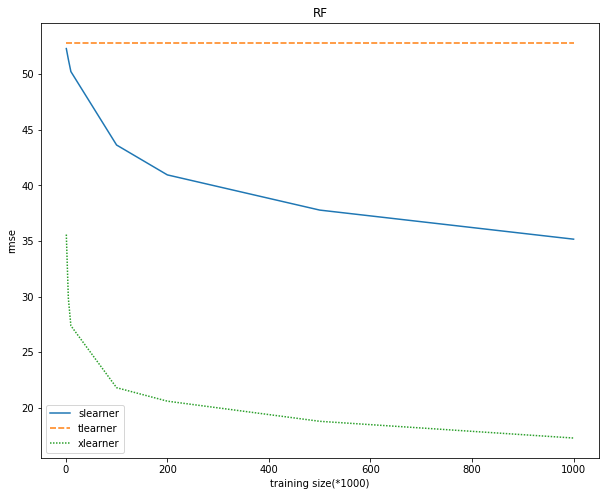

In [79]:
fig, p = plt.subplots(figsize = (10,8))
p=sns.lineplot(data=rf_results_df2)
p.set_xlabel('training size(*1000)')
p.set_ylabel('rmse')
p.set_title("RF")

Text(0.5, 1.0, 'XGBoost')

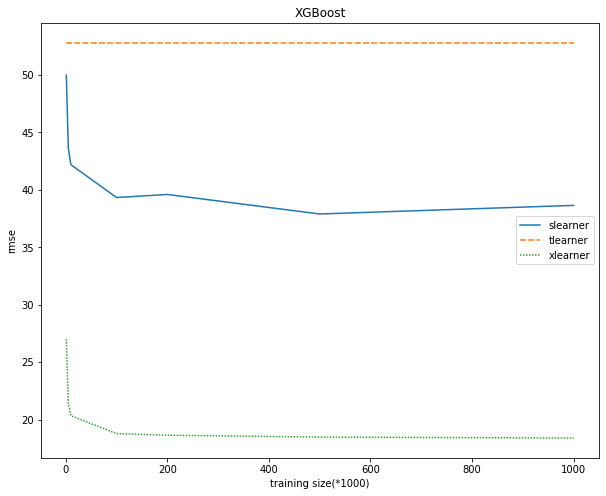

In [62]:
fig, p = plt.subplots(figsize = (10,8))
p=sns.lineplot(data=xgb_results_df2)
p.set_xlabel('training size(*1000)')
p.set_ylabel('rmse')
p.set_title("XGBoost")

####  Complex nonlinear

In [ ]:
data_generator = synthetic_data(N=(1100000), d=20,simulation=3)
true_ite,  X, y,treatment,propensity = data_generator.get_full_data()

baselearner = RandomForestRegressor(max_depth = 20, n_estimators = 20)
slearner = Slearner(baselearner = baselearner, is_regressor=True)
tlearner = Tlearner(baseclearner = baselearner, basetlearner = baselearner,is_regressor=True)
xlearner = Xlearner(learner = baselearner, propensity_model = LogisticRegression(),is_regressor=True)


rf_results3={}
rf_results3['slearner'] = simulate_result(slearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
rf_results3['tlearner'] = simulate_result(tlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
rf_results3['xlearner'] = simulate_result(xlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])

In [ ]:
baselearner = xgb.XGBRegressor(objective ='reg:squarederror')
slearner = Slearner(baselearner = baselearner, is_regressor=True)
tlearner = Tlearner(baseclearner = baselearner, basetlearner = baselearner,is_regressor=True)
xlearner = Xlearner(learner = baselearner, propensity_model = LogisticRegression(),is_regressor=True)

xgb_results3={}
xgb_results3['slearner'] = simulate_result(slearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
xgb_results3['tlearner'] = simulate_result(tlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
xgb_results3['xlearner'] = simulate_result(xlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])

In [82]:
rf_results_df3 = pd.DataFrame(data = rf_results3,index=[1,5,10,100,200,500,1000])
xgb_results_df3 = pd.DataFrame(data = xgb_results3,index=[1,5,10,100,200,500,1000])

Text(0.5, 1.0, 'RF')

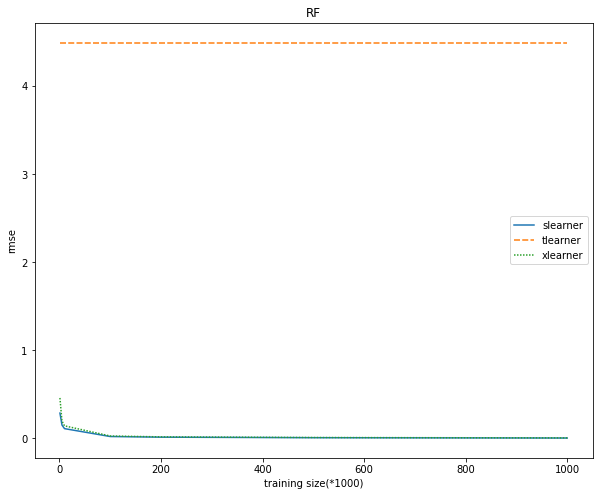

In [83]:
fig, p = plt.subplots(figsize = (10,8))
p=sns.lineplot(data=rf_results_df3)
p.set_xlabel('training size(*1000)')
p.set_ylabel('rmse')
p.set_title("RF")

Text(0.5, 1.0, 'XGBoost')

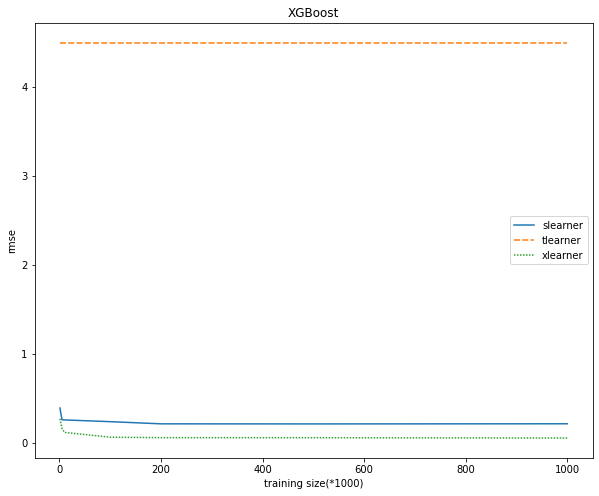

In [84]:
fig, p = plt.subplots(figsize = (10,8))
p=sns.lineplot(data=xgb_results_df3)
p.set_xlabel('training size(*1000)')
p.set_ylabel('rmse')
p.set_title("XGBoost")

### 1.2.2 No treatment effect

#### Global linear

In [70]:
data_generator = synthetic_data(N=(1100000), d=20,simulation=4)
true_ite,  X, y,treatment,propensity = data_generator.get_full_data()

baselearner = RandomForestRegressor(max_depth = 20, n_estimators = 20)
slearner = Slearner(baselearner = baselearner, is_regressor=True)
tlearner = Tlearner(baseclearner = baselearner, basetlearner = baselearner,is_regressor=True)
xlearner = Xlearner(learner = baselearner, propensity_model = LogisticRegression(),is_regressor=True)


rf_results4={}
rf_results4['slearner'] = simulate_result(slearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
rf_results4['tlearner'] = simulate_result(tlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
rf_results4['xlearner'] = simulate_result(xlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])


100%|██████████| 7/7 [17:52<00:00, 153.25s/it]

100%|██████████| 7/7 [16:30<00:00, 141.46s/it]

100%|██████████| 7/7 [33:59<00:00, 291.43s/it]


In [71]:
baselearner = xgb.XGBRegressor(objective ='reg:squarederror')
slearner = Slearner(baselearner = baselearner, is_regressor=True)
tlearner = Tlearner(baseclearner = baselearner, basetlearner = baselearner,is_regressor=True)
xlearner = Xlearner(learner = baselearner, propensity_model = LogisticRegression(),is_regressor=True)
xgb_results4={}
xgb_results4['slearner'] = simulate_result(slearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
xgb_results4['tlearner'] = simulate_result(tlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
xgb_results4['xlearner'] = simulate_result(xlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])


100%|██████████| 7/7 [06:50<00:00, 58.70s/it]

100%|██████████| 7/7 [05:59<00:00, 51.43s/it]

100%|██████████| 7/7 [11:51<00:00, 101.67s/it]


In [72]:
rf_results_df4 = pd.DataFrame(data = rf_results4,index=[1,5,10,100,200,500,1000])
xgb_results_df4 = pd.DataFrame(data = xgb_results4,index=[1,5,10,100,200,500,1000])

Text(0.5, 1.0, 'RF')

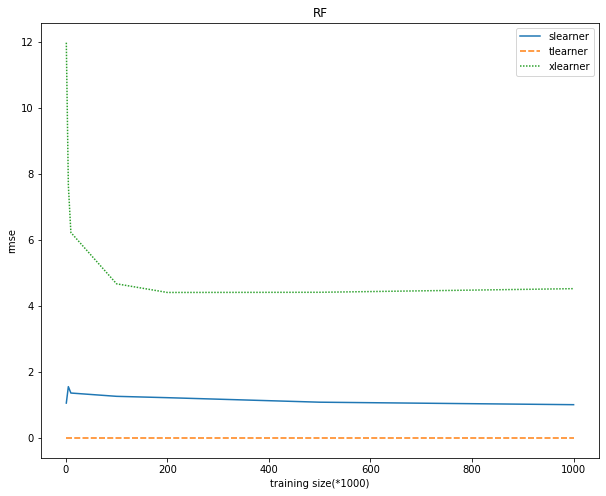

In [73]:
fig, p = plt.subplots(figsize = (10,8))
p=sns.lineplot(data=rf_results_df4)
p.set_xlabel('training size(*1000)')
p.set_ylabel('rmse')
p.set_title("RF")

Text(0.5, 1.0, 'XGBoost')

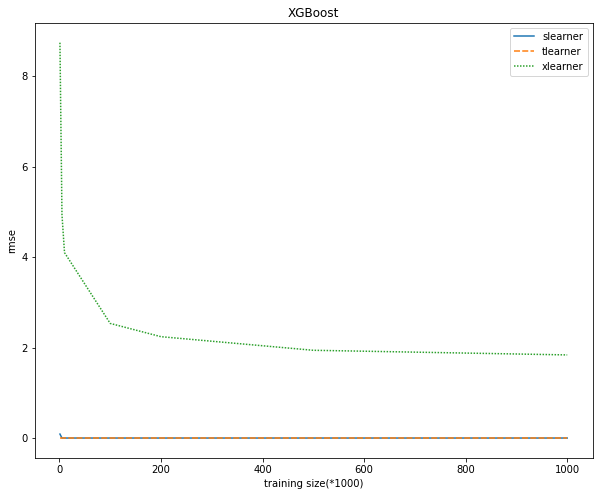

In [74]:
fig, p = plt.subplots(figsize = (10,8))
p=sns.lineplot(data=xgb_results_df4)
p.set_xlabel('training size(*1000)')
p.set_ylabel('rmse')
p.set_title("XGBoost")

#### piecewise linear

In [13]:
data_generator = synthetic_data(N=(1100000), d=20,simulation=5)
true_ite,  X, y,treatment,propensity = data_generator.get_full_data()

baselearner = RandomForestRegressor(max_depth = 20, n_estimators = 20)
slearner = Slearner(baselearner = baselearner, is_regressor=True)
tlearner = Tlearner(baseclearner = baselearner, basetlearner = baselearner,is_regressor=True)
xlearner = Xlearner(learner = baselearner, propensity_model = LogisticRegression(),is_regressor=True)


rf_results5={}
rf_results5['slearner'] = simulate_result(slearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
rf_results5['tlearner'] = simulate_result(tlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
rf_results5['xlearner'] = simulate_result(xlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])


100%|██████████| 7/7 [17:45<00:00, 152.26s/it]

100%|██████████| 7/7 [15:37<00:00, 133.99s/it]

100%|██████████| 7/7 [37:25<00:00, 320.78s/it]


In [10]:
data_generator = synthetic_data(N=(1100000), d=20,simulation=5)
true_ite,  X, y,treatment,propensity = data_generator.get_full_data()

baselearner = xgb.XGBRegressor(objective ='reg:squarederror')
slearner = Slearner(baselearner = baselearner, is_regressor=True)
tlearner = Tlearner(baseclearner = baselearner, basetlearner = baselearner,is_regressor=True)
xlearner = Xlearner(learner = baselearner, propensity_model = LogisticRegression(),is_regressor=True)
xgb_results5={}
xgb_results5['slearner'] = simulate_result(slearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
xgb_results5['tlearner'] = simulate_result(tlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
xgb_results5['xlearner'] = simulate_result(xlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])

100%|██████████| 7/7 [12:11<00:00, 104.46s/it]


In [14]:
rf_results_df5 = pd.DataFrame(data = rf_results5,index=[1,5,10,100,200,500,1000])
xgb_results_df5 = pd.DataFrame(data = xgb_results5,index=[1,5,10,100,200,500,1000])

Text(0.5, 1.0, 'RF')

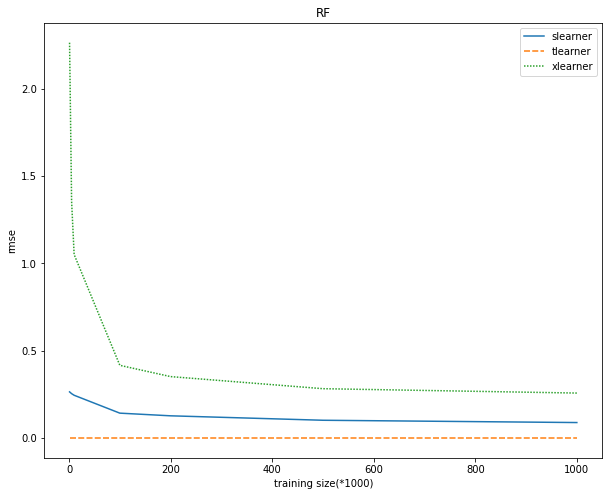

In [15]:
fig, p = plt.subplots(figsize = (10,8))
p=sns.lineplot(data=rf_results_df5)
p.set_xlabel('training size(*1000)')
p.set_ylabel('rmse')
p.set_title("RF")

Text(0.5, 1.0, 'XGBoost')

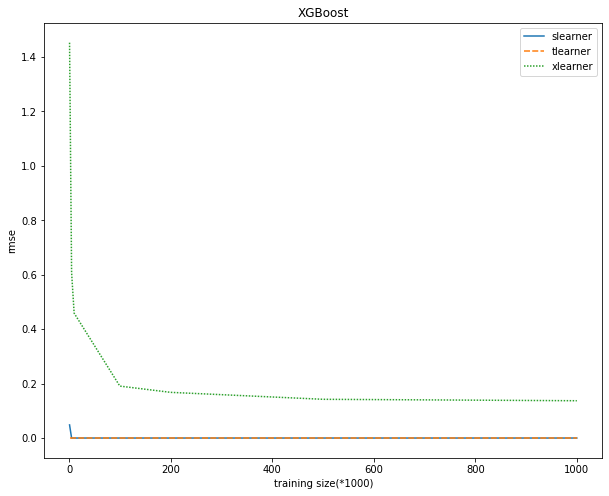

In [16]:
fig, p = plt.subplots(figsize = (10,8))
p=sns.lineplot(data=xgb_results_df5)
p.set_xlabel('training size(*1000)')
p.set_ylabel('rmse')
p.set_title("XGBoost")

## 1.3 Confounding 

In [ ]:
data_generator = synthetic_data(N=(1100000), d=20,simulation=6)
true_ite,  X, y,treatment,propensity = data_generator.get_full_data()

baselearner = RandomForestRegressor(max_depth = 20, n_estimators = 20)
slearner = Slearner(baselearner = baselearner, is_regressor=True)
tlearner = Tlearner(baseclearner = baselearner, basetlearner = baselearner,is_regressor=True)
xlearner = Xlearner(learner = baselearner, propensity_model = LogisticRegression(),is_regressor=True)

rf_results6={}
rf_results6['slearner'] = simulate_result(slearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
rf_results6['tlearner'] = simulate_result(tlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
rf_results6['xlearner'] = simulate_result(xlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])

In [ ]:
baselearner = xgb.XGBRegressor(objective ='reg:squarederror')
slearner = Slearner(baselearner = baselearner, is_regressor=True)
tlearner = Tlearner(baseclearner = baselearner, basetlearner = baselearner,is_regressor=True)
xlearner = Xlearner(learner = baselearner, propensity_model = LogisticRegression(),is_regressor=True)
xgb_results6={}
xgb_results6['slearner'] = simulate_result(slearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
xgb_results6['tlearner'] = simulate_result(tlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])
xgb_results6['xlearner'] = simulate_result(xlearner,true_ite,  X, y,treatment,test_size = 100000,train_sizes = [1000,5000,10000,100000,200000,500000,1000000])

In [19]:
rf_results_df6 = pd.DataFrame(data = rf_results6,index=[1,5,10,100,200,500,1000])
xgb_results_df6 = pd.DataFrame(data = xgb_results6,index=[1,5,10,100,200,500,1000])

Text(0.5, 1.0, 'RF')

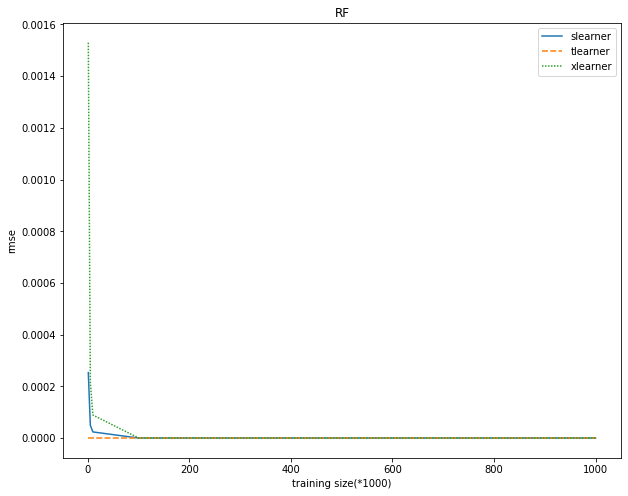

In [20]:
fig, p = plt.subplots(figsize = (10,8))
p=sns.lineplot(data=rf_results_df6)
p.set_xlabel('training size(*1000)')
p.set_ylabel('rmse')
p.set_title("RF")

Text(0.5, 1.0, 'XGBoost')

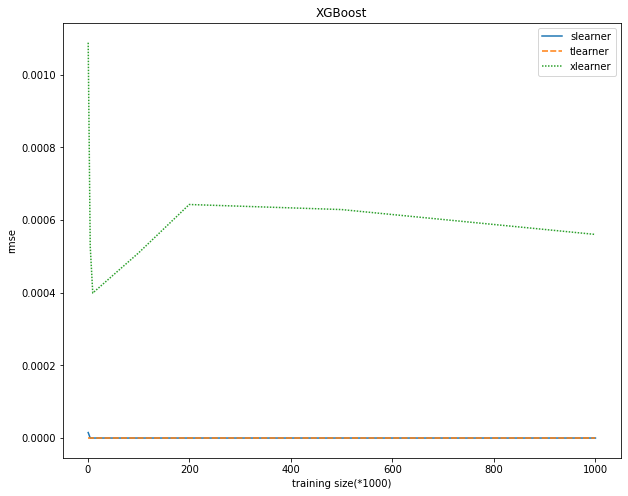

In [21]:
fig, p = plt.subplots(figsize = (10,8))
p=sns.lineplot(data=xgb_results_df6)
p.set_xlabel('training size(*1000)')
p.set_ylabel('rmse')
p.set_title("XGBoost")